In [1]:
from pylab import *
import matplotlib.pyplot as plt
import bloch
from progressbar import ProgressBar, Percentage, Bar, ETA

# saturation efficiency

In [2]:
# w1 = linspace(0,10,100) * 256.7
# kew = logspace(0, 5, 100)

# alpha = zeros((len(kew),len(w1)))
# # = w1**2 / (w1**2 + kew**2)

In [3]:
# for ii in range(len(kew)):
#     for jj in range(len(w1)):
#         alpha[ii,jj] = w1[jj]**2 / (w1[jj]**2 + kew[ii]**2)

In [4]:
# fig, ax = plt.subplots(figsize=(4.8,4.8),dpi=300)

# y=log10(kew)
# x=w1/256.7

# im = ax.pcolormesh(x, y , alpha, vmin=0, vmax=1)
# # cbar=fig.colorbar(im, ax=ax)
# # cbar.ax.tick_params(labelsize=20) 

# y_label_list = ['10$^0$','10$^1$','10$^2$','10$^3$','10$^4$','10$^5$']
# ax.set_yticklabels(y_label_list, fontsize=20)

# x_label_list = ['0','2','4','6','8','10']
# ax.set_xticklabels(x_label_list, fontsize=20)

# plt.ylabel('k$_{sw}$ (s$^{-1}$)', fontsize=25)
# plt.xlabel('$B$$_{1}}$ ($\mu$T)', fontsize=25)
# # plt.title('saturation efficiency ($\\alpha$)', fontsize=25)
# # l(r'$\lambda$')

# plt.show()

In [18]:
satPulse = zeros((1, 3))
satPulse[0,0] = 0.
satPulse[0,1] = 3*42.57
satPulse[0,2] = 4.0

freewater = bloch.Pool('freewater', t1 = 1.6, t2 = 0.062, lifetime = 1., chemical_shift = -0.0001, concentration = 111200)
macromolecular = bloch.Pool('macromolecular', t1 = 1, t2 = 0.00006, lifetime = 1/40., chemical_shift = 0.001, concentration = 0.001)



In [6]:
cestFreq = linspace(15,25,11)
exchangeRates = logspace(0, 5, 101)
w1 = linspace(0,10,101)

signal = zeros((9, len(exchangeRates), len(w1), len(cestFreq)))

pbar = ProgressBar(widgets=['Simulation ', Percentage(), Bar(), ETA()], maxval=signal.shape[1]).start()

for ii in range(len(exchangeRates)):
    for jj in range(len(w1)):
        satPulse[0,1] = w1[jj]*42.57
        
        amide = bloch.Pool('amide', t1 = 1, t2 = 0.1, lifetime = 1/exchangeRates[ii], chemical_shift = 20., concentration = 72.)

        Zspec = bloch.solve((freewater, amide,  macromolecular), cestFreq, satPulse, crusher=False, magnetic_field=7., pulse_repeat = 1, post_dynamic_delay=inf)
        signal[:,ii,jj] = squeeze(Zspec)
        
    pbar.update(pi)
pbar.finish()

Simulation 100%|#################################################|Time: 0:04:03


In [9]:
# save_dir = '/Volumes/T7/CEST_labeling/data/'
# from scipy.io import savemat
# savemat(save_dir + 'simulationMatrix_saturation_efficiency_7T_V1.mat', {'Data':signal})


In [10]:
# save_dir = '/Volumes/T7/CEST_labeling/data/'
# from scipy.io import savemat
# savemat(save_dir + 'simulationMatrix_saturation_efficiency_7T_V1.mat', {'Data':signal})


In [7]:
index = where(cestFreq == 20)
Z = squeeze(1- signal[7,:,:,index]*(111200/72.))
Z.shape

(101, 101)

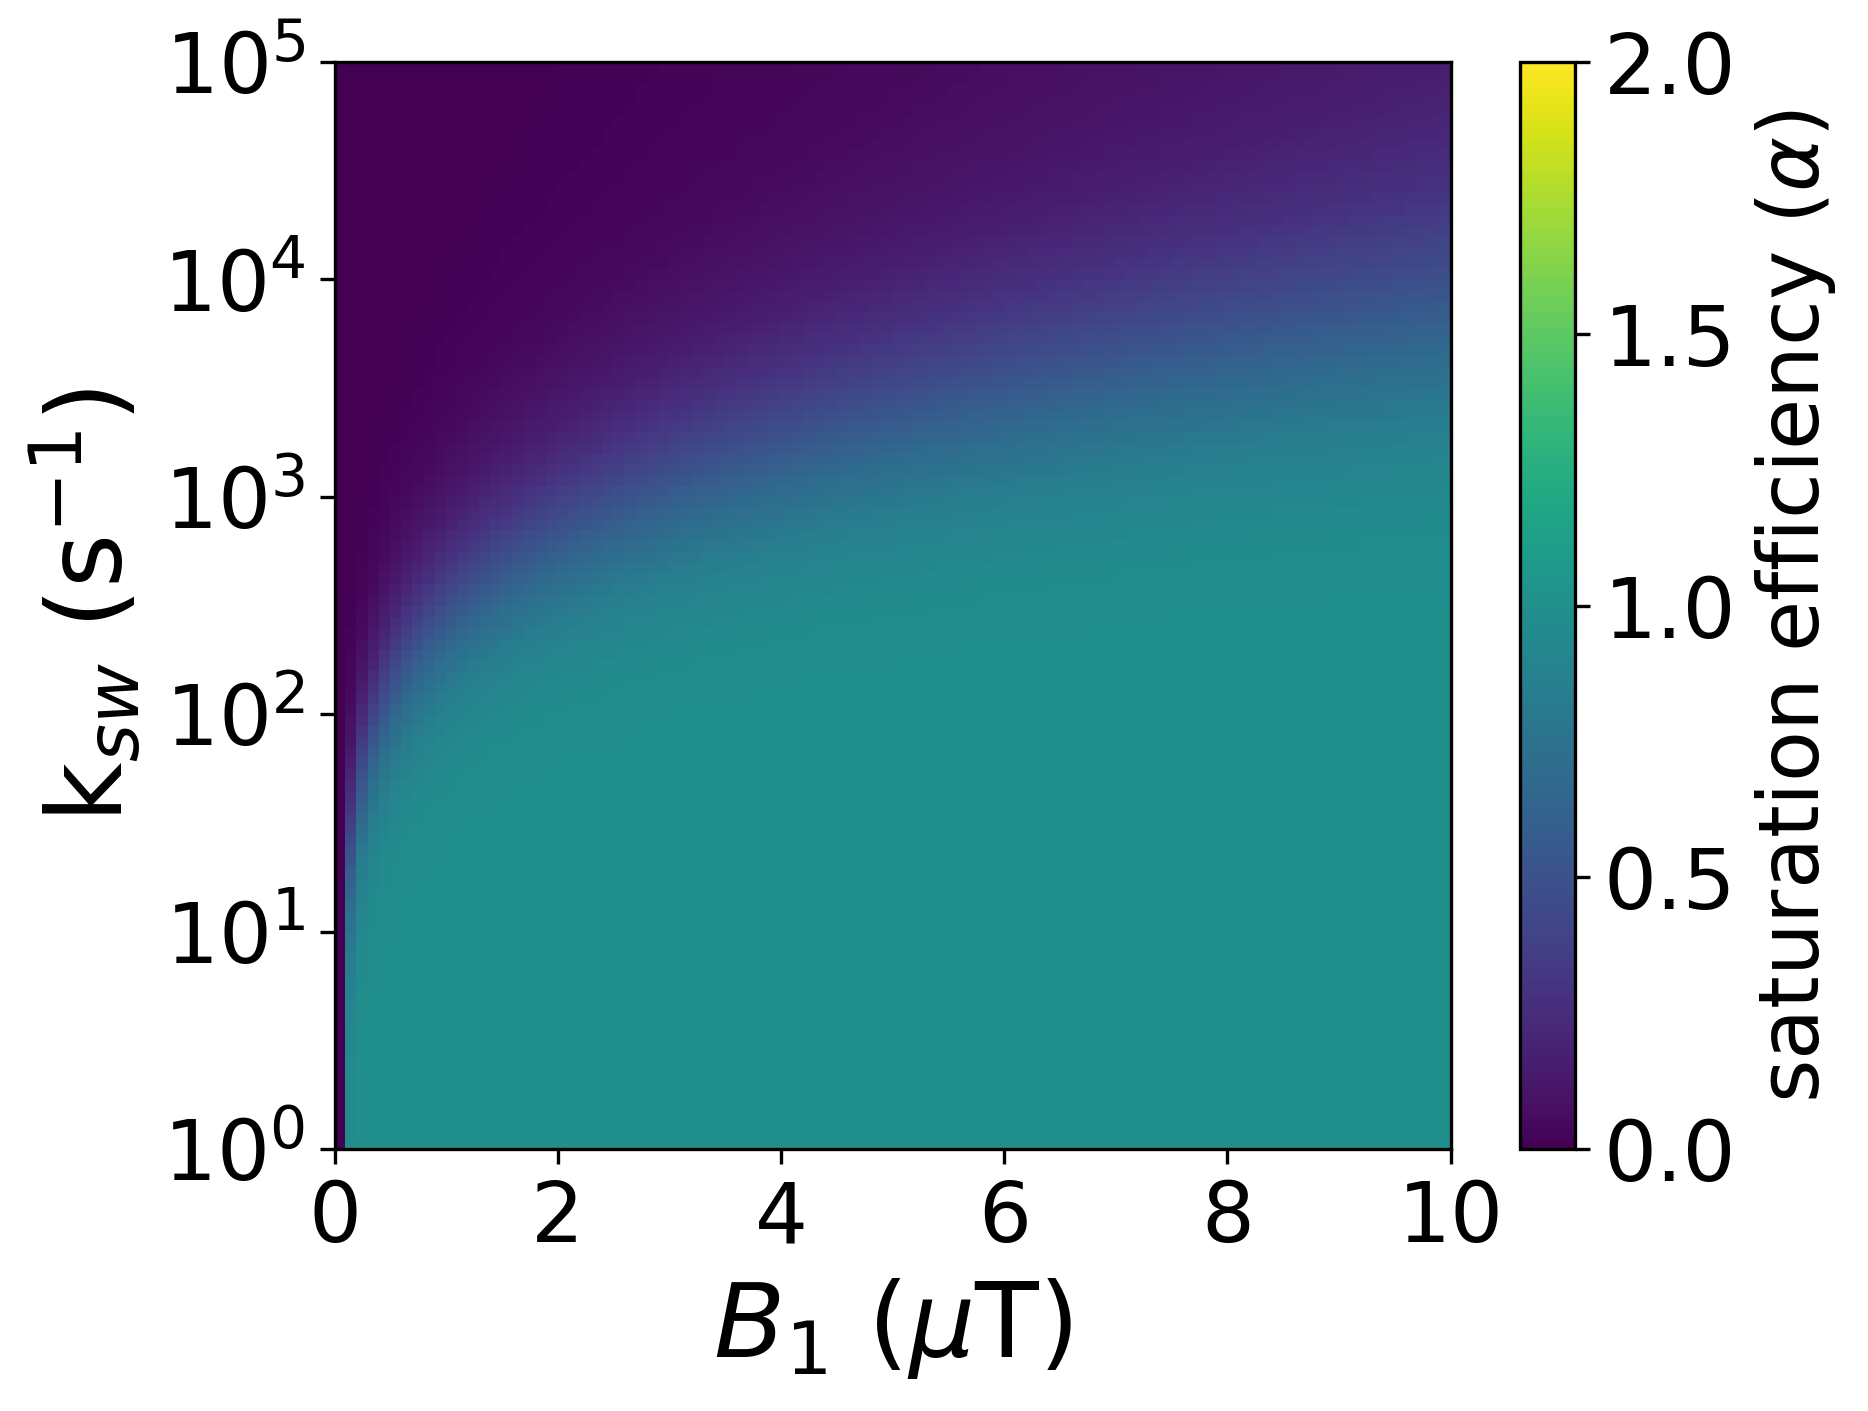

In [13]:
fig, ax = plt.subplots(figsize=(6,4.8),dpi=300)

y=log10(exchangeRates)
x=w1
Z_show = squeeze(Z)

im = ax.pcolormesh(x, y, Z_show, vmin=0, vmax=2)
cbar = fig.colorbar(im, ticks=[0, 0.5, 1, 1.5, 2])
cbar.ax.tick_params(labelsize=20) 
cbar.set_label(r'saturation efficiency ($\alpha$)', fontsize=20)

# cbar=fig.colorbar(im, ax=ax)
# cbar.ax.tick_params(labelsize=20) 

y_label_list = ['10$^0$','10$^1$','10$^2$','10$^3$','10$^4$','10$^5$']
ax.set_yticklabels(y_label_list, fontsize=20)

x_label_list = ['0','2','4','6','8','10']
ax.set_xticklabels(x_label_list, fontsize=20)

plt.ylabel('k$_{sw}$ (s$^{-1}$)', fontsize=25)
plt.xlabel('$B$$_{1}}$ ($\mu$T)', fontsize=25)
# plt.xlabel('$\omega$$_{1}}$ ($\mu$T)', fontsize=25)
# plt.title('saturation efficiency ($\\alpha$)', fontsize=25)
# l(r'$\lambda$')

plt.show()

In [19]:
cestFreq = linspace(15,25,11)
exchangeRates = logspace(0, 5, 51)
tdur = linspace(0,10,51)

signal = zeros((9, len(exchangeRates), len(tdur), len(cestFreq)))

pbar = ProgressBar(widgets=['Simulation ', Percentage(), Bar(), ETA()], maxval=signal.shape[1]).start()

for ii in range(len(exchangeRates)):
    for jj in range(len(tdur)):
        satPulse[0,2] = tdur[jj]
        
        amide = bloch.Pool('amide', t1 = 1, t2 = 0.1, lifetime = 1/exchangeRates[ii], chemical_shift = 20., concentration = 72.)

        Zspec = bloch.solve((freewater, amide,  macromolecular), cestFreq, satPulse, crusher=False, magnetic_field=7., pulse_repeat = 1, post_dynamic_delay=inf)
        signal[:,ii,jj] = squeeze(Zspec)
        
    pbar.update(pi)
pbar.finish()

Simulation 100%|#################################################|Time: 0:00:53


In [22]:
index = where(cestFreq == 20)
Z = squeeze(1- signal[7,:,:,index]*(111200/72.))
Z.shape

(51, 51)

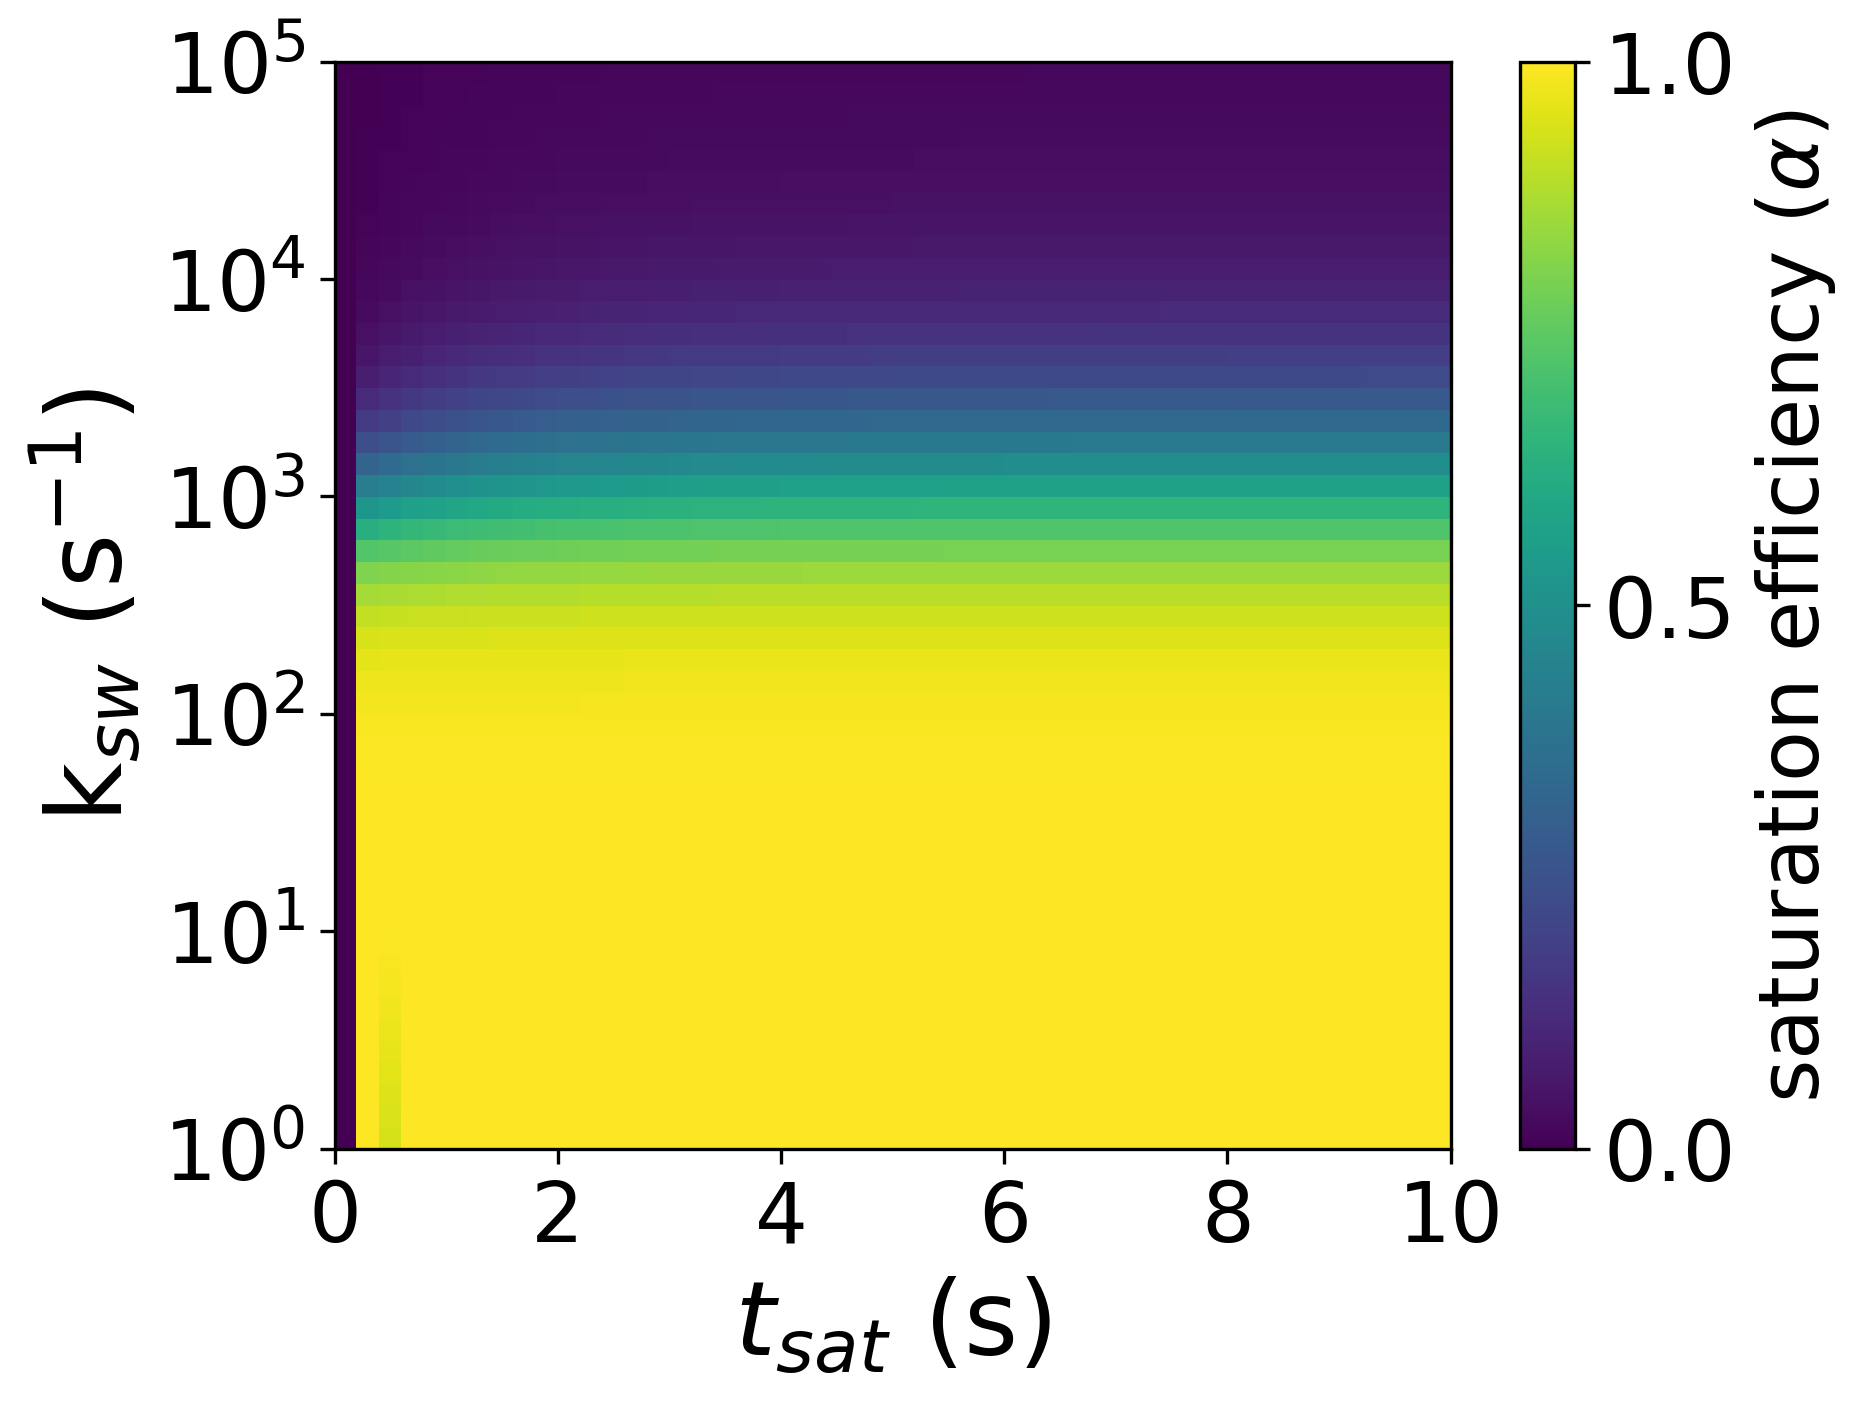

In [23]:
fig, ax = plt.subplots(figsize=(6,4.8),dpi=300)

y=log10(exchangeRates)
x=tdur
Z_show = squeeze(Z)

im = ax.pcolormesh(x, y, Z_show, vmin=0, vmax=1)
cbar = fig.colorbar(im, ticks=[0, 0.5, 1, 1.5, 2])
cbar.ax.tick_params(labelsize=20) 
cbar.set_label(r'saturation efficiency ($\alpha$)', fontsize=20)

# cbar=fig.colorbar(im, ax=ax)
# cbar.ax.tick_params(labelsize=20) 

y_label_list = ['10$^0$','10$^1$','10$^2$','10$^3$','10$^4$','10$^5$']
ax.set_yticklabels(y_label_list, fontsize=20)

x_label_list = ['0','2','4','6','8','10']
ax.set_xticklabels(x_label_list, fontsize=20)

plt.ylabel('k$_{sw}$ (s$^{-1}$)', fontsize=25)
plt.xlabel('$t$$_{sat}}$ (s)', fontsize=25)
# plt.xlabel('$\omega$$_{1}}$ ($\mu$T)', fontsize=25)
# plt.title('saturation efficiency ($\\alpha$)', fontsize=25)
# l(r'$\lambda$')

plt.show()